# KVASIR Dataset (Simple Neural Network)

Based on https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

## Loading dataset from disk

Define data and labels. Here data[i] will contain resized and preprocessed images and label[i] will contain corresponding label for data[i].

In [1]:
data = []
labels = []

Load image paths from `images` diresctory. Later shuffle image paths with a predetermined seed to maintain reproducibility.

In [2]:
from imutils import paths
import random

In [3]:
RANDOM_SEED = 170081

random.seed(RANDOM_SEED)

In [4]:
DATASET_DIRECTORY = "images"

image_paths = list(paths.list_images(DATASET_DIRECTORY))
random.shuffle(image_paths)

In [5]:
image_paths[:5]

['images/normal-cecum/4a647a81-4440-4c55-9f98-bb4cfe76e962.jpg',
 'images/esophagitis/a51f5df9-1e6c-449d-95cd-9f5773ce1d5b.jpg',
 'images/normal-pylorus/d64d18d3-4356-40e7-8346-32deb619a68c.jpg',
 'images/normal-cecum/347b7b2e-d2f8-4e4c-9313-85dc2f2ea25a.jpg',
 'images/normal-pylorus/0b917df8-8d7a-4349-9c2e-eec9a20a8893.jpg']

Define a preprocessing function to accept a image path return and return a preprocessed and flattened numpy array of a predetermined size.

In [6]:
import cv2

In [7]:
def preprocess_image(image_path, width=32, height=32):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (width, height))
    image = image.flatten()
    return image

Preprocess each image and store flattened image(32*32*3=3072) in `data` list and label in `labels` list.

Note: Each image should be in a directory corresponding to the class is belongs to

In [8]:
import os

Remove all invalid image paths.

In [9]:
image_paths = [image_path for image_path in image_paths \
               if '.ipynb_checkpoints' not in image_path]

In [10]:
IMAGE_SIZE = 32

print("[INFO] Started pre-processing")

for i in range(len(image_paths)):
    image_path = image_paths[i]
    
    image = preprocess_image(image_path, width=IMAGE_SIZE, height=IMAGE_SIZE)
    label = image_path.split(os.path.sep)[-2]
    
    data.append(image)
    labels.append(label)
    
    if i%250 == 0:
        print(f"[INFO] {i}/{len(image_paths)} done")

print("[INFO] pre-processing completed")

[INFO] Started pre-processing
[INFO] 0/8000 done
[INFO] 250/8000 done
[INFO] 500/8000 done
[INFO] 750/8000 done
[INFO] 1000/8000 done
[INFO] 1250/8000 done
[INFO] 1500/8000 done
[INFO] 1750/8000 done
[INFO] 2000/8000 done
[INFO] 2250/8000 done
[INFO] 2500/8000 done
[INFO] 2750/8000 done
[INFO] 3000/8000 done
[INFO] 3250/8000 done
[INFO] 3500/8000 done
[INFO] 3750/8000 done
[INFO] 4000/8000 done
[INFO] 4250/8000 done
[INFO] 4500/8000 done
[INFO] 4750/8000 done
[INFO] 5000/8000 done
[INFO] 5250/8000 done
[INFO] 5500/8000 done
[INFO] 5750/8000 done
[INFO] 6000/8000 done
[INFO] 6250/8000 done
[INFO] 6500/8000 done
[INFO] 6750/8000 done
[INFO] 7000/8000 done
[INFO] 7250/8000 done
[INFO] 7500/8000 done
[INFO] 7750/8000 done
[INFO] pre-processing completed


In [11]:
list(zip(data[:5], labels[:5]))

[(array([4, 4, 4, ..., 2, 2, 2], dtype=uint8), 'normal-cecum'),
 (array([0, 0, 0, ..., 1, 1, 1], dtype=uint8), 'esophagitis'),
 (array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'normal-pylorus'),
 (array([5, 5, 5, ..., 1, 1, 1], dtype=uint8), 'normal-cecum'),
 (array([15, 15, 15, ..., 15, 15, 15], dtype=uint8), 'normal-pylorus')]

Scale pixel values to be in between 0-1 instead of 0-255. Also converts them to a numpy array.

In [12]:
import numpy as np

In [13]:
data = np.array(data, dtype='float')
labels = np.array(labels)

data = data / 255

In [14]:
list(zip(data[:5], labels[:5]))

[(array([0.01568627, 0.01568627, 0.01568627, ..., 0.00784314, 0.00784314,
         0.00784314]), 'normal-cecum'),
 (array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
         0.00392157]), 'esophagitis'),
 (array([0., 0., 0., ..., 0., 0., 0.]), 'normal-pylorus'),
 (array([0.01960784, 0.01960784, 0.01960784, ..., 0.00392157, 0.00392157,
         0.00392157]), 'normal-cecum'),
 (array([0.05882353, 0.05882353, 0.05882353, ..., 0.05882353, 0.05882353,
         0.05882353]), 'normal-pylorus')]

## Split into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, \
                                                    test_size=0.25, \
                                                    random_state=RANDOM_SEED)

In [17]:
train_x[:5]

array([[0.01960784, 0.01960784, 0.01960784, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.0745098 , 0.0745098 ,
        0.0745098 ],
       [0.00784314, 0.01568627, 0.01568627, ..., 0.00784314, 0.00784314,
        0.00784314],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
train_y[:5]

array(['dyed-lifted-polyps', 'normal-pylorus', 'dyed-resection-margins',
       'dyed-resection-margins', 'esophagitis'], dtype='<U22')

In [19]:
test_x[:5]

array([[0.01568627, 0.01568627, 0.01568627, ..., 0.        , 0.        ,
        0.        ],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.05882353, 0.05882353,
        0.05882353],
       [0.01960784, 0.02352941, 0.01568627, ..., 0.00784314, 0.00784314,
        0.00784314],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.0745098 , 0.0745098 ,
        0.0745098 ],
       [0.01176471, 0.01960784, 0.01960784, ..., 0.00784314, 0.01176471,
        0.01176471]])

In [20]:
test_y[:5]

array(['polyps', 'esophagitis', 'normal-cecum', 'normal-pylorus',
       'dyed-lifted-polyps'], dtype='<U22')

Keras will assume that,
* Labels are encoded as integers
* Labels are on-hot encoded

So labels have to be encoded as such. For this scikit learn label binarizer is used. However if this is 2-class only, use Keras' to_categorical function.

In [21]:
from sklearn.preprocessing import LabelBinarizer

In [22]:
label_binarizer = LabelBinarizer()

In [23]:
label_binarizer.fit(labels)

train_y = label_binarizer.transform(train_y)
test_y = label_binarizer.transform(test_y)

In [24]:
train_y[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

In [25]:
test_y[:5]

array([[0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]])

## Defining and Compiling Keras Model Architecture

![Architecture](https://www.pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_simplenn_arch.png)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [27]:
input_shape = (IMAGE_SIZE*IMAGE_SIZE*3,)
output_size = len(label_binarizer.classes_)

model = Sequential()
model.add(Dense(1024, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(output_size, activation='softmax'))

W0811 05:45:57.400700 140593862854464 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 05:45:57.612761 140593862854464 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 05:45:57.655673 140593862854464 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Compile the model using SGD(Stochastic Gradient Descent) as optimizer and categorical cross-entropy loss (use binary_crossentropy for 2-class classification)

In [28]:
from keras.optimizers import SGD

In [29]:
INITIAL_LEARNING_RATE = 0.01
EPOCHS = 50

optimizer = SGD(lr=INITIAL_LEARNING_RATE)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,\
             metrics=['accuracy'])

W0811 05:45:58.177842 140593862854464 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 05:45:58.194482 140593862854464 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Training the Model

In [30]:
print("[INFO] training network")

history = model.fit(x=train_x, \
                    y=train_y, \
                   batch_size=32,\
                   epochs=EPOCHS,\
                   validation_data=(test_x, test_y))

print("[INFO] training completed")

[INFO] training network


W0811 05:45:58.528587 140593862854464 deprecation.py:323] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 05:45:58.582337 140593862854464 deprecation_wrapper.py:119] From /home/kdsuneraavinash/Programs/miniconda3/envs/tf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 6000 samples, validate on 2000 samples
Epoch 1/50
6000/6000 [==============================] - 11s 2ms/step - loss: 2.0366 - acc: 0.1975 - val_loss: 1.9771 - val_acc: 0.2605
Epoch 2/50
6000/6000 [==============================] - 7s 1ms/step - loss: 1.9047 - acc: 0.3005 - val_loss: 1.8581 - val_acc: 0.2175
Epoch 3/50
6000/6000 [==============================] - 8s 1ms/step - loss: 1.7591 - acc: 0.3733 - val_loss: 1.6828 - val_acc: 0.4210
Epoch 4/50
6000/6000 [==============================] - 7s 1ms/step - loss: 1.6018 - acc: 0.4395 - val_loss: 1.5269 - val_acc: 0.4615
Epoch 5/50
6000/6000 [==============================] - 8s 1ms/step - loss: 1.4628 - acc: 0.4832 - val_loss: 1.4071 - val_acc: 0.4695
Epoch 6/50
6000/6000 [==============================] - 8s 1ms/step - loss: 1.3496 - acc: 0.5038 - val_loss: 1.3066 - val_acc: 0.4970
Epoch 7/50
6000/6000 [==============================] - 8s 1ms/step - loss: 1.2562 - acc: 0.5272 - val_loss: 1.2201 - val_acc: 0.5590
Epoch 8/50
60

## Evaluating the model

In [31]:
from sklearn.metrics import classification_report

In [32]:
predictions = model.predict(test_x, batch_size=32)

correct_predictions = test_y.argmax(axis=1)
real_predictions = predictions.argmax(axis=1)

class_names = label_binarizer.classes_
report = classification_report(correct_predictions, \
                               real_predictions, \
                               target_names=class_names)

print(report)

                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.51      0.58      0.54       245
dyed-resection-margins       0.66      0.52      0.58       259
           esophagitis       0.75      0.53      0.63       236
          normal-cecum       0.78      0.79      0.78       262
        normal-pylorus       0.85      0.88      0.87       234
         normal-z-line       0.61      0.80      0.69       259
                polyps       0.54      0.52      0.53       254
    ulcerative-colitis       0.70      0.72      0.71       251

              accuracy                           0.67      2000
             macro avg       0.67      0.67      0.67      2000
          weighted avg       0.67      0.67      0.66      2000



In [33]:
import matplotlib.pyplot as plt

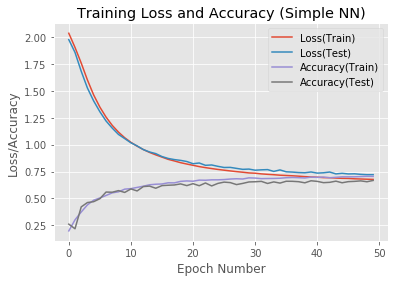

In [34]:
PLOT_SAVE_PATH = "evaluation_simple_nn.png"

epoch_range = np.arange(0, EPOCHS)
plt.style.use('ggplot')
plt.figure()

plt.plot(epoch_range, history.history['loss'], label='Loss(Train)')
plt.plot(epoch_range, history.history['val_loss'], label='Loss(Test)')
plt.plot(epoch_range, history.history['acc'], label='Accuracy(Train)')
plt.plot(epoch_range, history.history['val_acc'], label='Accuracy(Test)')

plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.savefig(PLOT_SAVE_PATH)

plt.show()

Saving the model in disk.

In [35]:
import pickle

In [36]:
MODEL_SAVE_PATH = "simple_nn.pickle"
LABEL_BINARIZER_SAVE_PATH = "simple_nn_lb.pickle"

model.save(MODEL_SAVE_PATH)

with open(LABEL_BINARIZER_SAVE_PATH, 'wb') as f:
    pickle.dump(label_binarizer, f)

## Predicting for new data 

In [37]:
from keras.models import load_model
import cv2
import pickle

In [38]:
IMAGE_LOAD_PATH = "images/dyed-resection-margins/016cc0c1-2a9e-464c-884f-0997561f7dde.jpg"

image = cv2.imread(IMAGE_LOAD_PATH)
image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
image = image.flatten()
image = image.reshape(1, image.shape[0])

model = load_model(MODEL_SAVE_PATH)

with open(LABEL_BINARIZER_SAVE_PATH, 'rb') as f:
    label_binarizer = pickle.load(f)

prediction = model.predict(image)

pred_i = prediction.argmax(axis=1)[0]
predicted_label = label_binarizer.classes_[pred_i]

In [39]:
list(zip(label_binarizer.classes_, prediction[0]))

[('dyed-lifted-polyps', 0.112207934),
 ('dyed-resection-margins', 0.86346847),
 ('esophagitis', 0.0017834352),
 ('normal-cecum', 8.833796e-14),
 ('normal-pylorus', 4.1595165e-08),
 ('normal-z-line', 0.022539865),
 ('polyps', 1.4422864e-07),
 ('ulcerative-colitis', 7.0178384e-11)]

In [40]:
predicted_label

'dyed-resection-margins'

In [41]:
import matplotlib.pyplot as plt

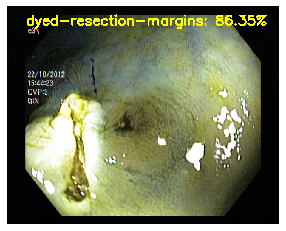

In [42]:
output = cv2.imread(IMAGE_LOAD_PATH)

text = "{}: {:.2f}%".format(predicted_label, prediction[0][pred_i] * 100)

cv2.putText(output, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
	(255, 255, 0), 3)

plt.axis('off')
plt.imshow(output)